In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [4]:
confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')

In [5]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
death=pd.read_csv('time_series_covid19_deaths_global.csv')

In [8]:
recover=pd.read_csv('time_series_covid19_recovered_global.csv')

In [9]:
recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cols=confirmed.keys()

In [15]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [19]:
confirmed=confirmed.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,0,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [24]:
recover=recover.loc[:,cols[4]:cols[-1]]
recover

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
deaths=death.loc[:,cols[4]:cols[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,0,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [28]:
dates=confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)

In [38]:
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
india_cases=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    print(confirmed[i])
    death_sum=deaths[i].sum()
    recover_sum=recover[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recover_sum)
    #india_cases.append(confirmed[conf])

0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/22/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/23/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/24/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/25/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/26/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/27/20, Length: 289, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/28/20, Length: 289, dtype: int64
0      0
1      0
2 

In [33]:
print(confirmed_sum)

676570149


In [34]:
print(death_sum)

6881802


In [35]:
print(recover_sum)

0


In [39]:
print(world_cases)

[557, 657, 944, 1437, 2120, 2929, 5580, 6169, 8237, 9927, 12038, 16787, 19887, 23899, 27644, 30806, 34400, 37131, 40162, 42771, 44814, 45232, 60384, 66912, 69055, 71238, 73273, 75155, 75655, 76216, 76846, 78608, 78990, 79558, 80412, 81384, 82728, 84152, 86023, 88402, 90382, 92994, 95338, 98078, 102062, 106199, 109997, 114292, 119051, 126527, 133283, 146477, 157365, 168598, 183165, 198339, 215900, 242987, 272517, 304944, 339156, 381711, 423594, 475075, 535889, 599820, 669402, 725918, 790929, 869371, 955728, 1038176, 1122386, 1182507, 1254222, 1328948, 1397886, 1480062, 1567243, 1653665, 1729180, 1847761, 1919593, 2004226, 2082482, 2176950, 2264830, 2343082, 2419404, 2495886, 2571973, 2654011, 2736728, 2820291, 2903496, 2974291, 3045275, 3121107, 3198435, 3282087, 3371033, 3449295, 3523292, 3600929, 3680614, 3771036, 3860174, 3950657, 4035000, 4110223, 4186364, 4271644, 4355992, 4451634, 4547536, 4641426, 4719789, 4808921, 4904739, 5010162, 5116135, 5223477, 5327627, 5420843, 5509066, 56

In [40]:
v=1
day_date=[]
for i in range(len(dates)):
    v=i*1
    day_date.append(v)
day_date

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Text(0, 0.5, 'Count of Cases')

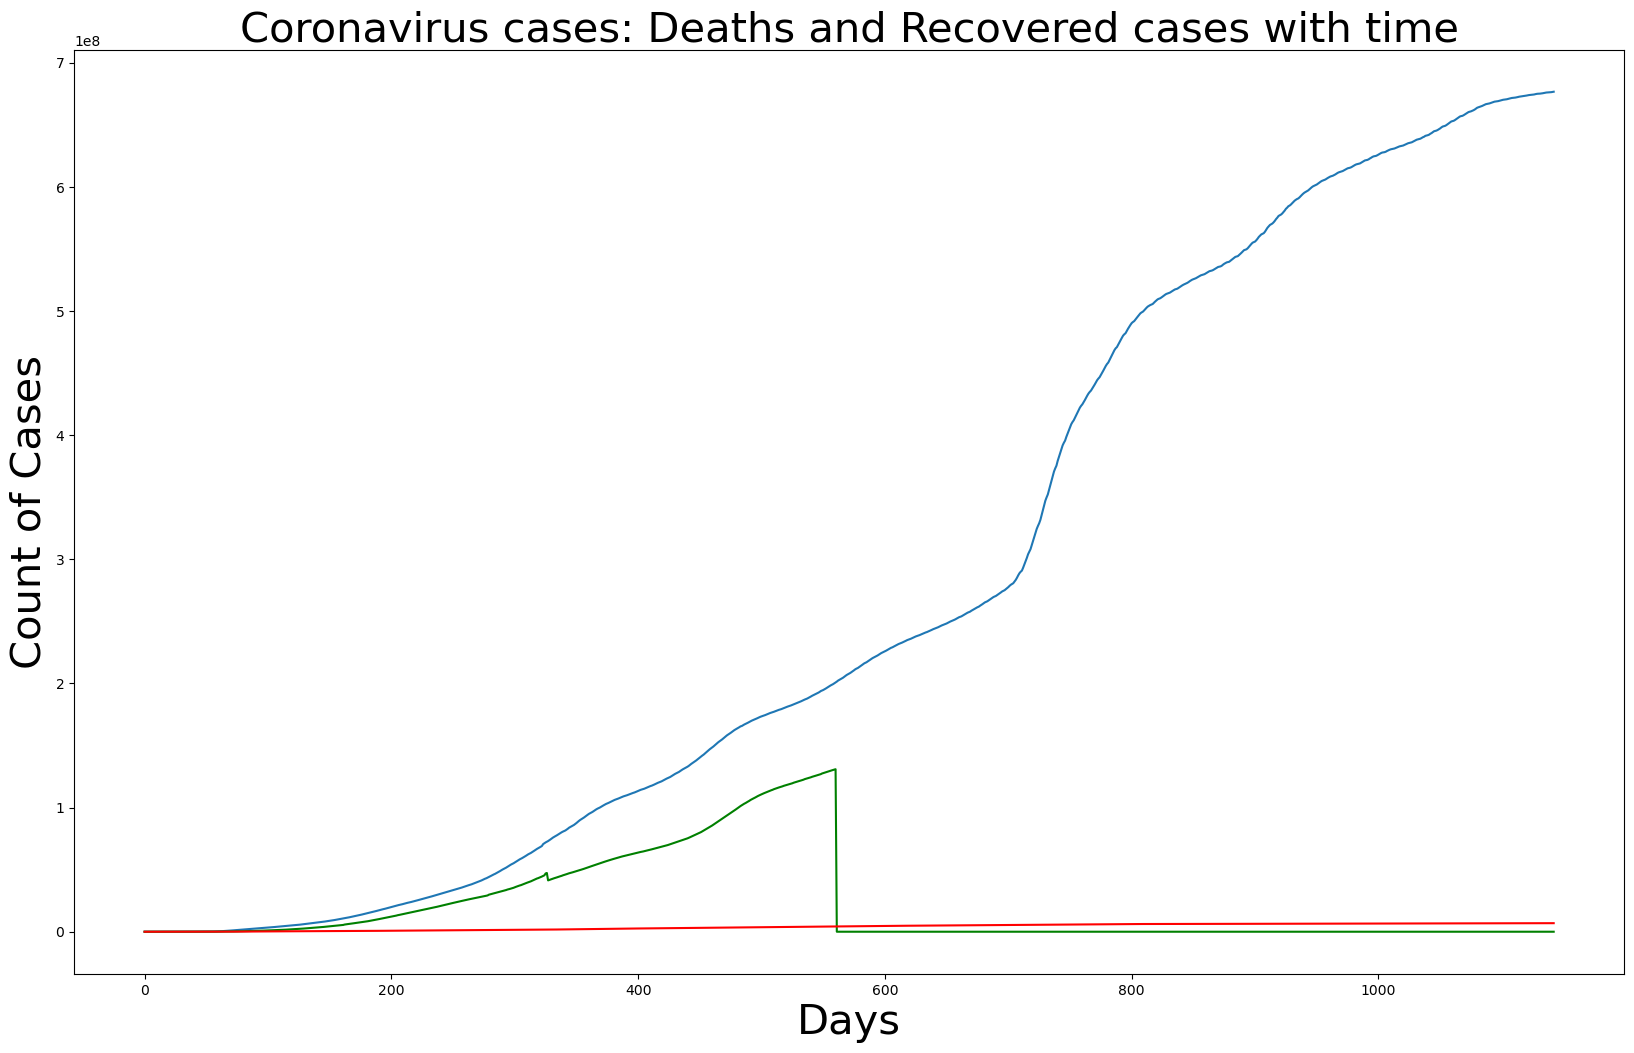

In [43]:
plt.figure(figsize=(20,12))
plt.plot(day_date, world_cases)
plt.plot(day_date,total_recovered, color='green')
plt.plot(day_date, total_deaths, color='red')
plt.title("Coronavirus cases: Deaths and Recovered cases with time",size=30)
plt.xlabel("Days",size=30)
plt.ylabel("Count of Cases",size=30)


In [49]:
def eachday_increase(records):
    d=[]
    for i in range(len(records)):
        if i==0:
            d.append(records[0])
        else:
            d.append(records[i]-records[i-1])
    return d


In [52]:
world_daily_increase=eachday_increase(world_cases)


In [53]:
print(type(world_cases))

<class 'list'>


In [58]:
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_recovered).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)
days=np.array(day_date).reshape(-1,1)
print(world_cases.shape)

(1143, 1)


In [62]:
days_in_future=10

future_forcast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)

adjusted_dates=future_forcast[:-10]




In [61]:
future_forcast

array([[   0],
       [   1],
       [   2],
       ...,
       [1150],
       [1151],
       [1152]])

In [63]:
adjusted_dates

array([[   0],
       [   1],
       [   2],
       ...,
       [1140],
       [1141],
       [1142]])

## dividing our data into train_test_split

In [64]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed=train_test_split(days, world_cases, test_size=0.25, shuffle=False)


In [96]:
model=LinearRegression()
model.fit(X_train_confirmed, y_train_confirmed)  #providing labelled data


LinearRegression()

In [97]:
test_pred=model.predict(X_test_confirmed)  #y_test_confirmed

In [98]:
predictions = model.predict(future_forcast)

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error #for checking accuracy of my model

In [100]:
mean_squared_error(test_pred,y_test_confirmed) 

#less MSE more accurate results

1.2938735082506654e+16

In [101]:
mean_absolute_error(test_pred, y_test_confirmed)

113340018.47926016

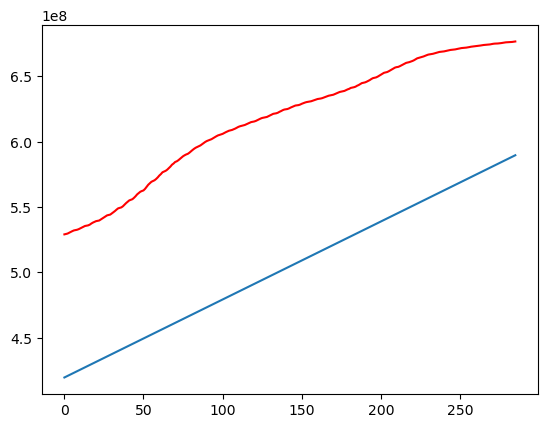

In [102]:
plt.plot(y_test_confirmed, color='red')
plt.plot(test_pred)